# Feature Engineering Impact Analysis

This notebook summarizes the impact of feature engineering techniques on model performance.


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')

# Load results
with open('../baseline_results.pkl', 'rb') as f:
    baseline = pickle.load(f)

with open('../feature_engineering_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Create summary
summary = pd.DataFrame({
    'Approach': [
        'Baseline (Label Encoding)',
        'One-Hot + Scaling',
        '+ Interaction Features',
        '+ Feature Selection'
    ],
    'Accuracy': [
        baseline['accuracy'],
        results['model1_accuracy'],
        results['model2_accuracy'],
        results['model3_accuracy']
    ]
})

print("FEATURE ENGINEERING IMPACT SUMMARY")
print("=" * 60)
print(summary.to_string(index=False))

# Calculate improvements
print("\nImprovements over Baseline:")
for i, row in summary.iterrows():
    if i > 0:
        improvement = row['Accuracy'] - summary.iloc[0]['Accuracy']
        print(f"  {row['Approach']}: +{improvement:.4f} ({improvement*100:.2f}%)")


FEATURE ENGINEERING IMPACT SUMMARY
                 Approach  Accuracy
Baseline (Label Encoding)  0.807001
        One-Hot + Scaling  0.855673
   + Interaction Features  0.856287
      + Feature Selection  0.854598

Improvements over Baseline:
  One-Hot + Scaling: +0.0487 (4.87%)
  + Interaction Features: +0.0493 (4.93%)
  + Feature Selection: +0.0476 (4.76%)


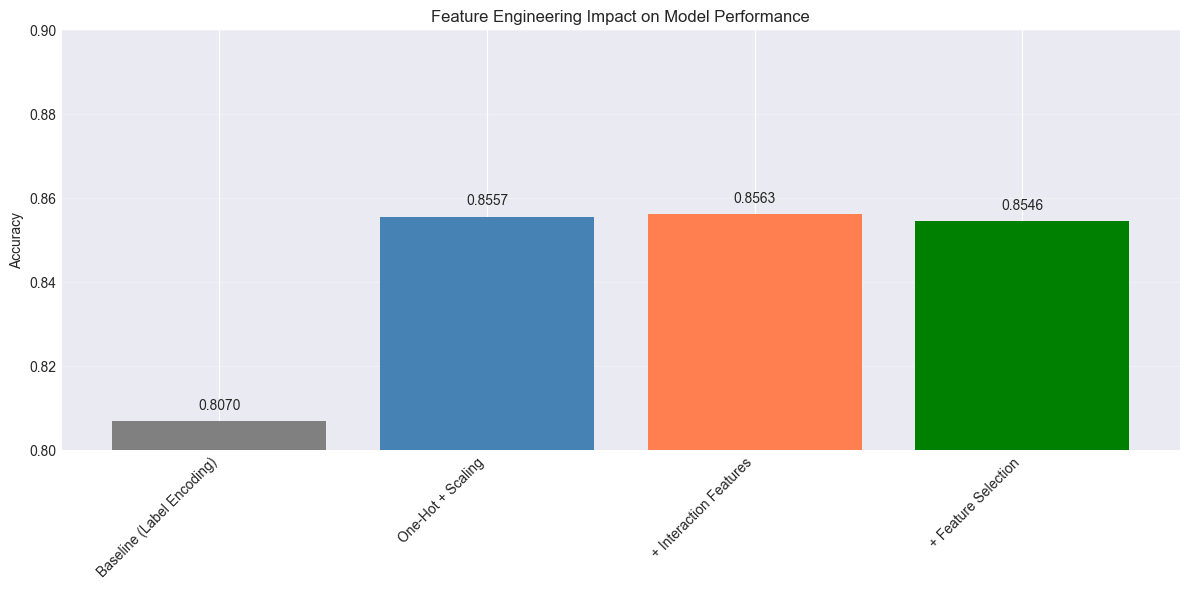

In [2]:
# Visualize
plt.figure(figsize=(12, 6))
plt.bar(summary['Approach'], summary['Accuracy'], 
        color=['gray', 'steelblue', 'coral', 'green'])
plt.ylabel('Accuracy')
plt.title('Feature Engineering Impact on Model Performance')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.8, 0.9])
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(summary['Accuracy']):
    plt.text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Key Takeaways

1. **One-Hot Encoding vs Label Encoding**: One-hot encoding preserves categorical relationships better
2. **Feature Scaling**: Essential for algorithms sensitive to feature scale
3. **Interaction Features**: Can capture non-linear relationships between features
4. **Feature Selection**: Reduces dimensionality and can improve generalization
5. **Cumulative Impact**: Combining techniques yields better results than individual techniques

Feature engineering is a crucial step that can significantly improve model performance!
